## Epsilon Greedy

In [229]:
import numpy as np
import sys

if "../" not in sys.path:
    sys.path.append("../")

from lib.envs.bandits.bandit import BanditEnv
from lib.simulation import Experiment
from lib.envs.bandits.policy import Policy
from lib.utils import randargmax

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [230]:
class EpsilonGreedy(Policy):
    def __init__(self, num_actions, epsilon):
        Policy.__init__(self, num_actions)
        if (epsilon is None or epsilon < 0 or epsilon > 1):
            print("EpsilonGreedy: Invalid value of epsilon", flush = True)
            sys.exit(0)
            
        self.epsilon = epsilon
        self.name = "Epsilon Greedy"
        
        self.total_rewards = np.zeros(num_actions, dtype = np.float32)
        self.total_counts = np.zeros(num_actions, dtype = np.float32)
    
    def act(self):
        choice = None
        if self.epsilon == 0:
            choice = 0
        elif self.epsilon == 1:
            choice = 1
        else:
            choice = np.random.binomial(1, self.epsilon)
            
        if choice == 1:
            return np.random.choice(self.num_actions)
        else:
            current_averages = np.divide(self.total_rewards, self.total_counts, where = self.total_counts > 0)
            current_averages[self.total_counts <= 0] = np.amax(current_averages)
            current_action = randargmax(current_averages)
            return current_action
        
    def feedback(self, action, reward):
        self.total_rewards[action] += reward
        self.total_counts[action] += 1

Distribution: bernoulli [0.47971008 0.1067235  0.5593316  0.81323057 0.70537389 0.60684874
 0.52069041 0.5730984  0.04698871 0.78943635]
Optimal action: 3


<Figure size 720x360 with 0 Axes>

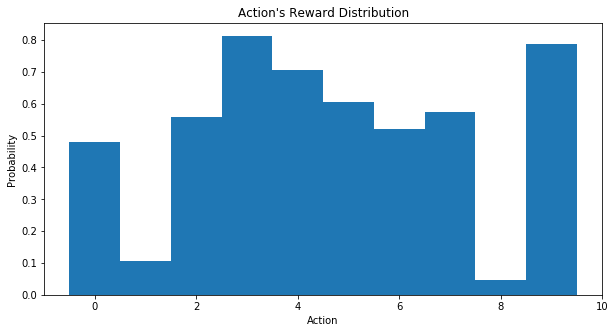

--------------------------------------------------
Policy: Epsilon Greedy 
Average Reward: 0.7917 
Average Regret: 0.024683597021030054
Arm pulls: [1.000e+00 1.000e+00 3.000e+00 2.000e+00 6.700e+01 1.000e+00 1.000e+00
 2.000e+00 1.000e+00 9.921e+03]


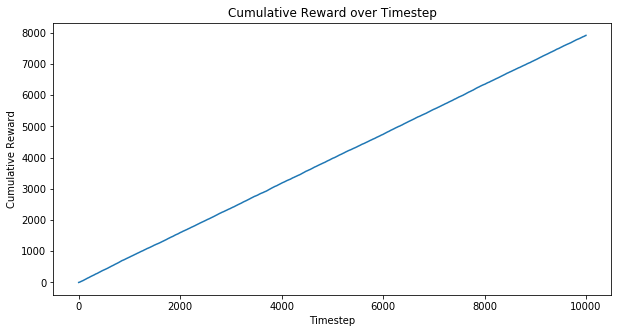

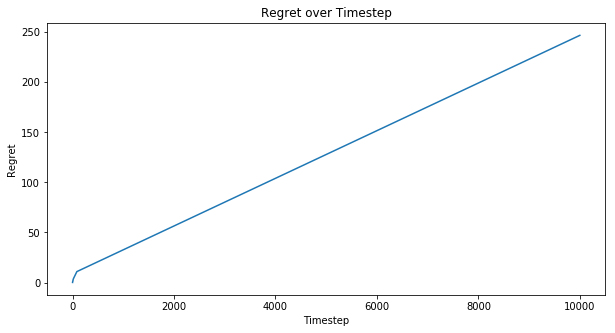

In [234]:
evaluation_seed = None
num_actions = 10
trials = 10000
distribution = "bernoulli"
epsilon = 0
env = BanditEnv(num_actions, distribution, evaluation_seed)
agent = EpsilonGreedy(num_actions, epsilon)
experiment = Experiment(env, agent)
experiment.run_bandit(trials)

Distribution: bernoulli [0.15416284 0.7400497  0.26331502 0.53373939 0.01457496 0.91874701
 0.90071485 0.03342143 0.95694934 0.13720932]
Optimal action: 8


<Figure size 720x360 with 0 Axes>

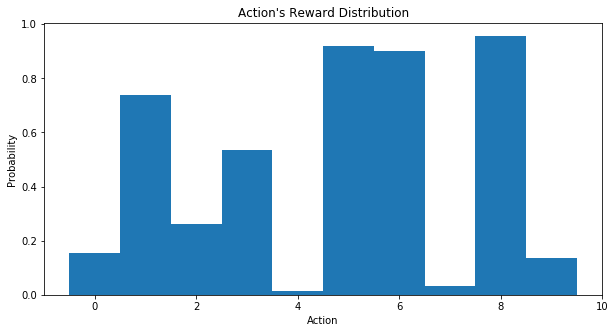

--------------------------------------------------
Policy: Epsilon Greedy 
Average Reward: 0.932 
Average Regret: 0.027163575939822153
Arm pulls: [  54.   51.   48.   63.   55.   49.   49.   63. 9516.   52.]


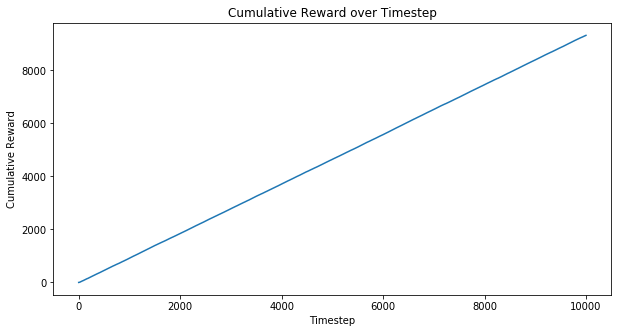

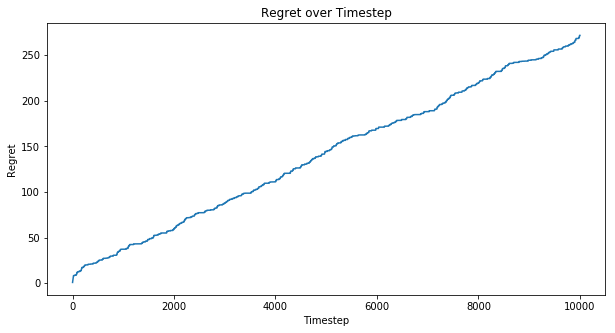

In [24]:
epsilon = 0.05
env = BanditEnv(num_actions, distribution, evaluation_seed)
agent = EpsilonGreedy(num_actions, epsilon)
experiment = Experiment(env, agent)
experiment.run_bandit(trials)

Distribution: bernoulli [0.15416284 0.7400497  0.26331502 0.53373939 0.01457496 0.91874701
 0.90071485 0.03342143 0.95694934 0.13720932]
Optimal action: 8


<Figure size 720x360 with 0 Axes>

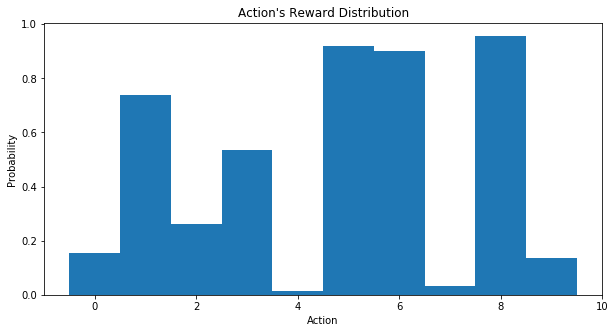

--------------------------------------------------
Policy: Epsilon Greedy 
Average Reward: 0.4876 
Average Regret: 0.4701724298687374
Arm pulls: [ 926.  980.  934. 1003.  941.  991.  941.  978. 1339.  967.]


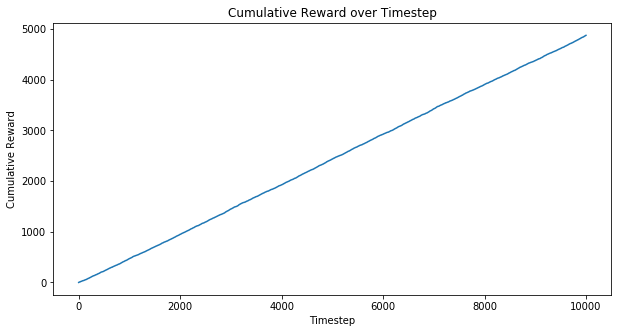

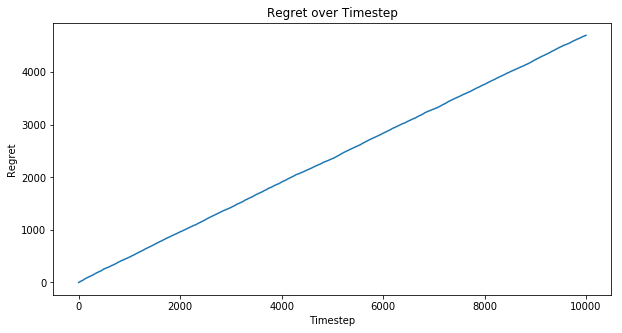

In [25]:
epsilon = 0.95
env = BanditEnv(num_actions, distribution, evaluation_seed)
agent = EpsilonGreedy(num_actions, epsilon)
experiment = Experiment(env, agent)
experiment.run_bandit(trials)